# Superstore Visualization VERSION 2

Zachary Lewis

# Missing Values - VER. 2

The Superstore operates internationally but only logs postal codes for customers in the US hence the large number of null fields. Furthermore, the column's data type is float resulting in postal codes with decimal points.

In the last assignment, I thought changing the `Postal Code` column from `float` to `int` was correct. I was mistaken and had missed that some states, e.g. Massachusettes, Connecticut, and New Jersey, saw postal codes beginning with zero altered due to Pandas automatically assigning the column's data type to `float`.

I addressed this with guidance from the videos embedded on the assignment page.

## Import Libraries And Set Notebook Defaults

In [ ]:
# Import in Pandas library as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set Pandas to display numbers with comma
# separators without scientific notation and two decimal
pd.options.display.float_format = '{:,.2f}'.format

# Fully display all columns in dataframes
pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', None)

# Automatically connect with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Workspace - Missing Values

In [ ]:
# Pull dataset from Google Drive and assign it to path
path = '/content/drive/MyDrive/Newman/Descriptive Analytics/Superstore EDA/data/Global_Superstore_Orders_2012_2015.xlsx'

# Read data into df and specify an object data type for Postal Code
df = pd.read_excel(path, dtype={'Postal Code': object})

# Adjust values with missing characters and replace '00nan' with 'na'
df['Postal Code'] = df['Postal Code'].astype('str').str.zfill(5).replace('00nan', 'na')

# Assign 'Sales', 'Discount', 'Profit', 'Shipping Cost' to 'columns'
columns = ['Sales', 'Discount', 'Profit', 'Shipping Cost']

# Round the values of the group of columns assigned to 'columns' by two decimals
df[columns] = df[columns].round(2)

# Return a sample of twenty rows from dataset
df.sample(20)



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
7949,22979,IN-2012-TM2149027-41249,2012-12-06,2012-12-10,Standard Class,TM-2149027,Tony Molinari,Consumer,na,Yiwu,Zhejiang,China,Eastern Asia,Asia Pacific,OFF-ST-4061,Office Supplies,Storage,"Eldon Folders, Industrial",87.30,5,0.00,2.55,6.98,Medium
30177,41102,CA-2014-AP10720140-41934,2014-10-22,2014-10-27,Standard Class,AP-107201408,Anne Pryor,Home Office,33311,Fort Lauderdale,Florida,United States,Southern US,USCA,FUR-FU-5984,Furniture,Furnishings,"Seth Thomas 14"" Day/Date Wall Clock",45.57,2,0.20,9.68,1.75,Medium
27301,1018,MX-2014-KD1661531-41873,2014-08-22,2014-08-24,First Class,KD-1661531,Ken Dana,Corporate,na,Matanzas,Matanzas,Cuba,Caribbean,LATAM,FUR-CH-5454,Furniture,Chairs,"Office Star Swivel Stool, Adjustable",117.62,1,0.00,24.70,51.36,Critical
44214,44732,NI-2015-CV229595-42259,2015-09-12,2015-09-16,Standard Class,CV-229595,Christina VanderZanden,Consumer,na,Kano,Kano,Nigeria,Western Africa,Africa,FUR-FU-3935,Furniture,Furnishings,"Deflect-O Door Stop, Erganomic",25.54,2,0.70,-44.30,2.67,High
6747,42572,EG-2012-CC237038-41215,2012-11-02,2012-11-05,First Class,CC-237038,Christopher Conant,Consumer,na,Alexandria,Al Iskandariyah,Egypt,North Africa,Africa,TEC-PH-5339,Technology,Phones,"Nokia Headset, Cordless",75.96,1,0.00,16.71,5.81,High
33613,1602,US-2014-DK1289555-42000,2014-12-27,2014-12-29,Second Class,DK-1289555,Dana Kaydos,Consumer,na,San Pedro Sula,Cortés,Honduras,Central America,LATAM,OFF-ST-6249,Office Supplies,Storage,"Tenex Folders, Blue",18.58,2,0.40,-0.02,1.40,High
25416,12843,ES-2014-SB2018548-41821,2014-07-01,2014-07-07,Standard Class,SB-2018548,Sarah Brown,Consumer,na,Ludwigshafen am Rhein,Rhineland-Palatinate,Germany,Western Europe,Europe,TEC-CO-3682,Technology,Copiers,"Canon Fax and Copier, Color",963.90,5,0.00,231.30,54.27,Medium
37680,20424,IN-2015-CC1247558-42129,2015-05-05,2015-05-07,Second Class,CC-1247558,Cindy Chapman,Consumer,na,Bhavnagar,Gujarat,India,Southern Asia,Asia Pacific,TEC-CO-3596,Technology,Copiers,"Brother Fax Machine, Digital","1,272.72",4,0.00,534.48,305.27,High
39481,10876,IT-2015-AM1036045-42167,2015-06-12,2015-06-18,Standard Class,AM-1036045,Alice McCarthy,Corporate,na,Paris,Ile-de-France,France,Western Europe,Europe,OFF-EN-3100,Office Supplies,Envelopes,"Ames Mailers, Recycled",207.90,6,0.00,4.14,14.88,Medium
26851,23758,IN-2014-HG149657-41864,2014-08-13,2014-08-19,Standard Class,HG-149657,Henry Goldwyn,Corporate,na,Adelaide,South Australia,Australia,Oceania,Asia Pacific,FUR-FU-5741,Furniture,Furnishings,"Rubbermaid Stacking Tray, Erganomic",159.62,8,0.10,30.02,10.17,Medium


In [ ]:
# Check for improper values.
df[df['State'].str.contains('Mass')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
1363,39250,CA-2012-KH16330140-40999,2012-03-31,2012-04-05,Standard Class,KH-163301406,Katharine Harms,Corporate,02151,Revere,Massachusetts,United States,Eastern US,USCA,OFF-ST-5704,Office Supplies,Storage,Rogers Profile Extra Capacity Storage Tub,66.96,4,0.00,2.68,1.57,Medium
1364,39251,CA-2012-KH16330140-40999,2012-03-31,2012-04-05,Standard Class,KH-163301406,Katharine Harms,Corporate,02151,Revere,Massachusetts,United States,Eastern US,USCA,OFF-BI-6634,Office Supplies,Binders,Zipper Ring Binder Pockets,6.24,2,0.00,3.06,1.34,Medium
2050,37862,CA-2012-CT11995140-41035,2012-05-06,2012-05-11,Standard Class,CT-119951406,Carol Triggs,Consumer,01841,Lawrence,Massachusetts,United States,Eastern US,USCA,FUR-CH-5090,Furniture,Chairs,"Lifetime Advantage Folding Chairs, 4/Carton",872.32,4,0.00,244.25,74.39,High
2051,37860,CA-2012-CT11995140-41035,2012-05-06,2012-05-11,Standard Class,CT-119951406,Carol Triggs,Consumer,01841,Lawrence,Massachusetts,United States,Eastern US,USCA,FUR-TA-3333,Furniture,Tables,Balt Split Level Computer Training Table,194.25,2,0.30,-38.85,21.73,High
2052,37859,CA-2012-CT11995140-41035,2012-05-06,2012-05-11,Standard Class,CT-119951406,Carol Triggs,Consumer,01841,Lawrence,Massachusetts,United States,Eastern US,USCA,OFF-BI-2927,Office Supplies,Binders,"Acco PRESSTEX Data Binder with Storage Hooks, ...",16.14,3,0.00,7.91,2.87,High
2053,37861,CA-2012-CT11995140-41035,2012-05-06,2012-05-11,Standard Class,CT-119951406,Carol Triggs,Consumer,01841,Lawrence,Massachusetts,United States,Eastern US,USCA,OFF-AR-5314,Office Supplies,Art,Newell 335,8.64,3,0.00,2.51,1.46,High
2153,34043,CA-2012-KT16480140-41040,2012-05-11,2012-05-16,Standard Class,KT-164801406,Kean Thornton,Consumer,02038,Franklin,Massachusetts,United States,Eastern US,USCA,FUR-TA-3434,Furniture,Tables,"Bevis Traditional Conference Table Top, Plinth...",700.06,3,0.30,-130.01,38.47,Medium
2294,37173,CA-2012-FG14260140-41049,2012-05-20,2012-05-25,Standard Class,FG-142601406,Frank Gastineau,Home Office,01841,Lawrence,Massachusetts,United States,Eastern US,USCA,OFF-BI-4360,Office Supplies,Binders,GBC ProClick Punch Binding System,447.86,7,0.00,219.45,29.70,Medium
2295,37175,CA-2012-FG14260140-41049,2012-05-20,2012-05-25,Standard Class,FG-142601406,Frank Gastineau,Home Office,01841,Lawrence,Massachusetts,United States,Eastern US,USCA,OFF-AP-3368,Office Supplies,Appliances,Belkin 8 Outlet Surge Protector,245.88,6,0.00,68.85,22.76,Medium
2296,37174,CA-2012-FG14260140-41049,2012-05-20,2012-05-25,Standard Class,FG-142601406,Frank Gastineau,Home Office,01841,Lawrence,Massachusetts,United States,Eastern US,USCA,OFF-PA-6551,Office Supplies,Paper,Xerox 1992,17.94,3,0.00,8.79,1.22,Medium


In [ ]:
# Check for duplicate data
df.duplicated()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Total count of rows and columns
# df.shape

In [ ]:
# Information of column datatypes with number of nonnull values per column
# df.info()

In [ ]:
# Sum of null values in the dataframe
# df.isna().sum()

In [ ]:
# columns = ['Country', 'City', 'State', 'Postal Code']
# mask = df['Postal Code'].isnull()

# # df[columns].loc[mask].sort_index().head(20)

In [ ]:
# columns = ['Country', 'City', 'State', 'Postal Code']
# mask = df['Postal Code'].notnull()

# df[columns].loc[mask].sort_values('Postal Code').head(20)

In [ ]:
# df[columns].loc[mask].value_counts()

In [ ]:
# df1[columns].loc[mask].value_counts().to_frame().sort_values('Postal Code').head(20)
# df[columns].loc[mask].value_counts().to_frame().sort_values('Postal Code').tail(20)

In [ ]:
# df1 = pd.read_excel('/content/drive/MyDrive/Newman/Descriptive Analytics/Superstore EDA/data/Global_Superstore_Orders_2012_2015.xlsx', sheet_name = 0, dtype = {'Postal Code': 'object'})

In [ ]:
# df1.sample(20)

# Reformat `Postal Code`

* Set as text data type: **object, string**
* Ensure leading zeros are kept: for instance **01040**
* Ensure nulls are recognizable as not applicable (for non-US addresses): **na**

In [ ]:
# path = '/content/drive/MyDrive/Newman/Descriptive Analytics/Superstore EDA/data/Global_Superstore_Orders_2012_2015.xlsx'

In [ ]:
# df1 = pd.read_excel(path, dtype={'Postal Code': object})

In [ ]:
# df1.sample(20)

In [ ]:
# df1['Postal Code'] = df1['Postal Code'].astype(str)
# df1['Postal Code'].sort_values()

In [ ]:
# df1.info()

In [ ]:
# df1['Postal Code'] = df1['Postal Code'].astype('str').str.zfill(5)
# column = ['Country', 'State', 'City', 'Postal Code']
# mask = df1['State'].str.contains('Conn') | df1['State'].str.contains('Mass')
# df1[columns].loc[mask].sort_values('Postal Code').head(20)

In [ ]:
# df1['Postal Code'].unique()

In [ ]:
# df1['Postal Code'] = df1['Postal Code'].replace('00nan', 'na')

In [ ]:
# df1['Postal Code'].sort_values().unique()

In [ ]:
# df1['Postal Code'].sample(10)

#Superstore Visualization

In [ ]:
df.Sales.describe()

,Sales
count,"51,290.00"
mean,246.49
std,487.57
min,0.44
25%,30.76
50%,85.06
75%,251.06
max,"22,638.48"


In [ ]:
Sales_Fig = ['Customer Name', 'State', 'Product Name', 'Sales']
df[Sales_Fig].sort_values(by='Sales', ascending = False).head(10)

,Customer Name,State,Product Name,Sales
1112,Sean Miller,Florida,Cisco TelePresence System EX90 Videoconferenci...,"22,638.48"
29567,Tamara Chand,Indiana,Canon imageCLASS 2200 Advanced Copier,"17,499.95"
36255,Raymond Buch,Washington,Canon imageCLASS 2200 Advanced Copier,"13,999.96"
46565,Tom Ashbrook,New York,Canon imageCLASS 2200 Advanced Copier,"11,199.97"
48165,Hunter Lopez,Delaware,Canon imageCLASS 2200 Advanced Copier,"10,499.97"
33013,Adrian Barton,Michigan,GBC Ibimaster 500 Manual ProClick Binding System,"9,892.74"
5565,Sanjit Chand,Minnesota,Ibico EPK-21 Electric Binding System,"9,449.95"
22487,Bill Shonely,New Jersey,"3D Systems Cube Printer, 2nd Generation, Magenta","9,099.93"
20703,Sanjit Engle,Virginia,HP Designjet T520 Inkjet Large Format Printer ...,"8,749.95"
23586,Christopher Conant,Pennsylvania,Canon imageCLASS 2200 Advanced Copier,"8,399.98"


## Histographs:

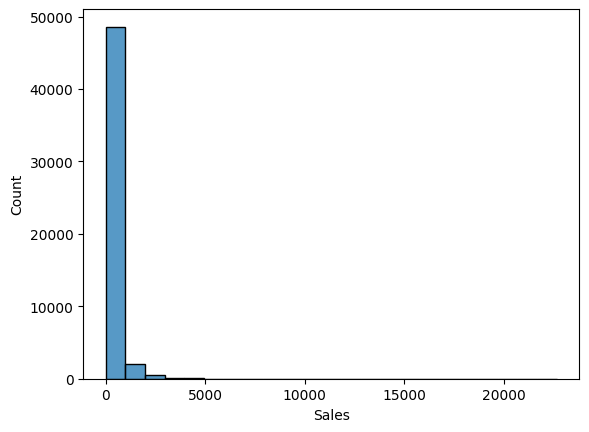

In [ ]:
# Return histogram of Sales
sns.histplot(df.Sales, binwidth=1000);

Sales is heavily skewed right with a few outliers

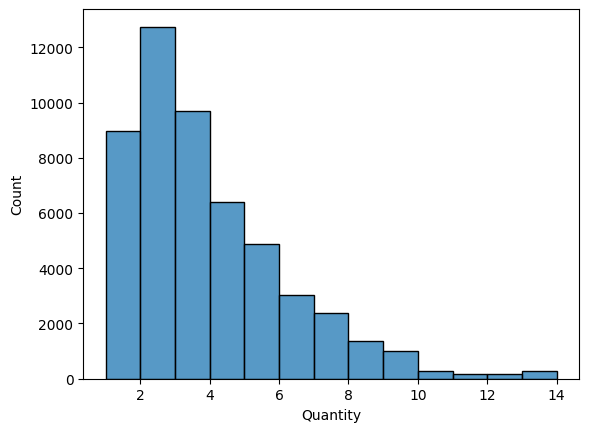

In [ ]:
# Returns histograph of Quantity
sns.histplot(df.Quantity, binwidth = 1);

The histograph for quantity is positively skewed with '2' having the largest representation and '13' the smallest.

In [ ]:
# Returns the value counts for Quantity
df.Quantity.value_counts()

,count
Quantity,
2,12748
3,9682
1,8963
4,6385
5,4882
6,3020
7,2385
8,1361
9,987


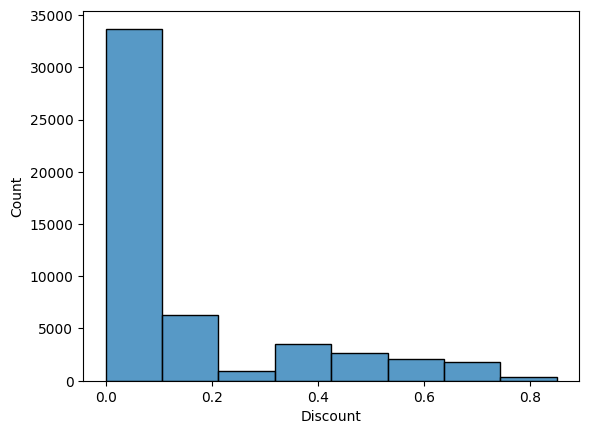

In [ ]:
# Returns histograph of Discount
sns.histplot(df.Discount, binwidth = 0.1);

Discount histograph is skewed right with majority of values between '0.0' and '0.1'.  

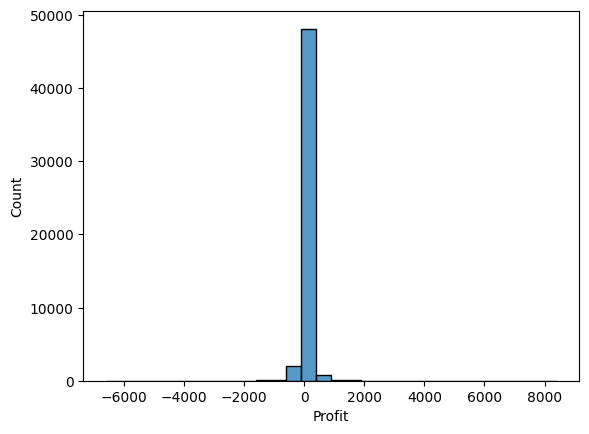

In [ ]:
# Returns histograph of Profit
sns.histplot(df.Profit, binwidth = 500);

Histograph shows outliers of profit losses and profit gains.

## Box Plots:

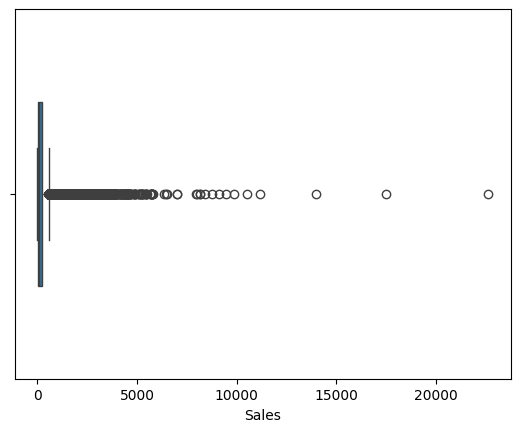

In [ ]:
# Returns box plot for Sales
sns.boxplot(x=df.Sales, width = .5);

Boxplot for Sales potentially shows a large number of outliers from 1000 and up. Particularly the three points starting from 13,000

In [ ]:
Sales_Fig = ['Customer Name', 'State', 'Product Name', 'Sales']
df[Sales_Fig].sort_values(by='Sales', ascending = False).head(10)

,Customer Name,State,Product Name,Sales
1112,Sean Miller,Florida,Cisco TelePresence System EX90 Videoconferenci...,"22,638.48"
29567,Tamara Chand,Indiana,Canon imageCLASS 2200 Advanced Copier,"17,499.95"
36255,Raymond Buch,Washington,Canon imageCLASS 2200 Advanced Copier,"13,999.96"
46565,Tom Ashbrook,New York,Canon imageCLASS 2200 Advanced Copier,"11,199.97"
48165,Hunter Lopez,Delaware,Canon imageCLASS 2200 Advanced Copier,"10,499.97"
33013,Adrian Barton,Michigan,GBC Ibimaster 500 Manual ProClick Binding System,"9,892.74"
5565,Sanjit Chand,Minnesota,Ibico EPK-21 Electric Binding System,"9,449.95"
22487,Bill Shonely,New Jersey,"3D Systems Cube Printer, 2nd Generation, Magenta","9,099.93"
20703,Sanjit Engle,Virginia,HP Designjet T520 Inkjet Large Format Printer ...,"8,749.95"
23586,Christopher Conant,Pennsylvania,Canon imageCLASS 2200 Advanced Copier,"8,399.98"


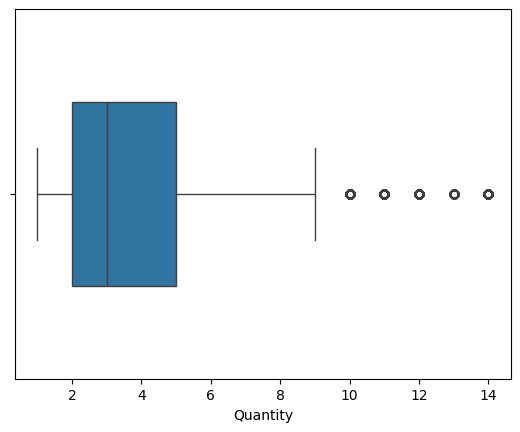

In [ ]:
# Returns box plot for Quantity
sns.boxplot(x=df.Quantity, width = .5);

Box plot for Quantity shows the 3 as the mean with potentially five outliers between 10 and 14.

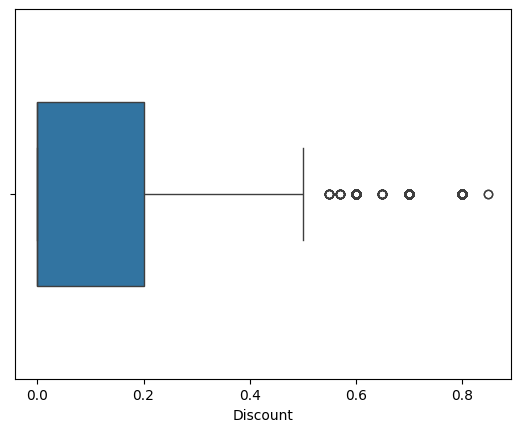

In [ ]:
# Returns box plot for Discount
sns.boxplot(x=df.Discount, width = .5);

Box plot for Discount shows majority of the store's discounts range from zero to 20% with seven outliers between 50% to 80%.

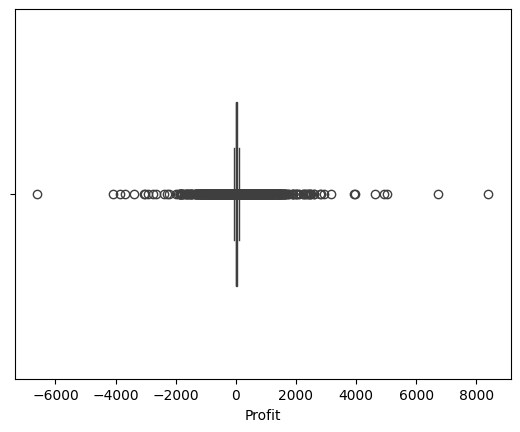

In [ ]:
# Returns box plot for Profit
sns.boxplot(x=df.Profit, width = .5);

Box plot for profit shows a vast range of outliers with the largest profit loss 6,599 and the largest profit gain 8,399.98

In [ ]:
profit_fig = ['Customer Name', 'City', 'State', 'Region', 'Product Name', 'Profit']
df[profit_fig].sort_values(by='Profit', ascending = False).head(50)

,Customer Name,City,State,Region,Product Name,Profit
29567,Tamara Chand,Lafayette,Indiana,Central US,Canon imageCLASS 2200 Advanced Copier,"8,399.98"
36255,Raymond Buch,Seattle,Washington,Western US,Canon imageCLASS 2200 Advanced Copier,"6,719.98"
48165,Hunter Lopez,Newark,Delaware,Eastern US,Canon imageCLASS 2200 Advanced Copier,"5,039.99"
33013,Adrian Barton,Detroit,Michigan,Central US,GBC Ibimaster 500 Manual ProClick Binding System,"4,946.37"
5565,Sanjit Chand,Minneapolis,Minnesota,Central US,Ibico EPK-21 Electric Binding System,"4,630.48"
43831,Patrick Jones,Prato,Tuscany,Southern Europe,"Hoover Stove, Red","3,979.08"
46565,Tom Ashbrook,New York City,New York,Eastern US,Canon imageCLASS 2200 Advanced Copier,"3,919.99"
10273,Christopher Martinez,Atlanta,Georgia,Southern US,Fellowes PB500 Electric Punch Plastic Comb Bin...,"3,177.48"
548,Carol Adams,Fuji,Shizuoka,Eastern Asia,"Samsung Smart Phone, VoIP","2,939.31"
24420,Cynthia Arntzen,Kota,Chhattisgarh,Southern Asia,"Apple Smart Phone, with Caller ID","2,817.99"


In [ ]:
profit_fig = ['Customer Name', 'City', 'State', 'Region', 'Product Name', 'Profit']
df[profit_fig].sort_values(by='Profit', ascending = True).head(50)

,Customer Name,City,State,Region,Product Name,Profit
31904,Cindy Stewart,Lancaster,Ohio,Eastern US,Cubify CubeX 3D Printer Double Head Print,"-6,599.98"
29213,Denise Monton,Bornova,Izmir,Western Asia,"Motorola Smart Phone, Cordless","-4,088.38"
47231,Grant Thornton,Burlington,North Carolina,Southern US,Cubify CubeX 3D Printer Triple Head Print,"-3,839.99"
3793,Luke Foster,San Antonio,Texas,Central US,GBC DocuBind P400 Electric Binding System,"-3,701.89"
37163,Sharelle Roach,Louisville,Colorado,Western US,Lexmark MX611dhe Monochrome Laser Printer,"-3,399.98"
24285,Saphhira Shifley,Lisbon,Lisboa,Southern Europe,"Hoover Stove, White","-3,059.82"
28510,Skye Norling,Lahore,Punjab,Southern Asia,"Apple Smart Phone, Full Size","-3,009.44"
49661,Henry Goldwyn,Chicago,Illinois,Central US,Ibico EPK-21 Electric Binding System,"-2,929.48"
34513,Julie Creighton,Vilnius,Vilnius,Northern Europe,"Barricks Conference Table, Rectangular","-2,750.28"
19275,Natalie Fritzler,Newark,Ohio,Eastern US,Cubify CubeX 3D Printer Double Head Print,"-2,639.99"


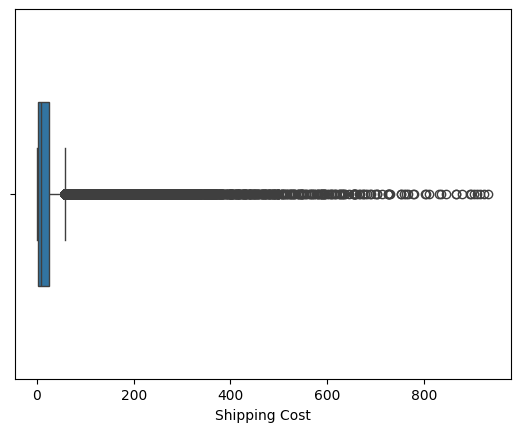

In [ ]:
# Returns box plot for Shipping Cost
sns.boxplot(x=df['Shipping Cost'], width = .5);

Shipping Cost appears to be relatively low on average. However, there is a large number of records that range from 50 to over 900.

In [ ]:
shipping_fig = ['Customer Name', 'City', 'State', 'Region', 'Product Name', 'Shipping Cost']
df[shipping_fig].sort_values(by='Shipping Cost', ascending = False).head(50)

,Customer Name,City,State,Region,Product Name,Shipping Cost
13912,Rick Hansen,New York City,New York,Eastern US,Plantronics CS510 - Over-the-Head monaural Wir...,933.57
20727,Justin Ritter,Wollongong,New South Wales,Oceania,"Novimex Executive Leather Armchair, Black",923.63
30040,Craig Reiter,Brisbane,Queensland,Oceania,"Nokia Smart Phone, with Caller ID",915.49
20543,Katherine Murray,Berlin,Berlin,Western Europe,"Motorola Smart Phone, Cordless",910.16
30718,Rick Hansen,Dakar,Dakar,Western Africa,"Sharp Wireless Fax, High-Speed",903.04
25300,Jim Mitchum,Sydney,New South Wales,Oceania,"Samsung Smart Phone, with Caller ID",897.35
6864,Toby Swindell,Porirua,Wellington,Oceania,"Novimex Executive Leather Armchair, Adjustable",894.77
10905,Mick Brown,Hamilton,Waikato,Oceania,"Chromcraft Conference Table, Fully Assembled",878.38
46040,Jane Waco,Sacramento,California,Western US,Fellowes PB500 Electric Punch Plastic Comb Bin...,867.69
9496,Joseph Holt,Concord,North Carolina,Southern US,Chromcraft Bull-Nose Wood Oval Conference Tabl...,865.74


In [ ]:
shipping_fig = ['Customer Name', 'City', 'State', 'Region', 'Product Name', 'Shipping Cost']
df[shipping_fig].sort_values(by='Shipping Cost', ascending = True).head(50)

,Customer Name,City,State,Region,Product Name,Shipping Cost
11846,Mick Crebagga,Tipitapa,Managua,Central America,"Eaton Computer Printout Paper, 8.5 x 11",1.00
9827,Ross Baird,Valinhos,São Paulo,South America,"Acco Index Tab, Economy",1.00
19883,Katherine Murray,Managua,Managua,Central America,"SanDisk Message Books, 8.5 x 11",1.01
40017,Zuschuss Carroll,Houston,Texas,Central US,Hoover Replacement Belt for Commercial Guardsm...,1.01
32210,Laurel Beltran,Oxnard,California,Western US,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",1.01
38805,Katharine Harms,Lucknow,Uttar Pradesh,Southern Asia,"Eaton Parchment Paper, Premium",1.01
41924,Deborah Brumfield,Townsville,Queensland,Oceania,"Avery Binder, Economy",1.01
39963,Katrina Edelman,Kure,Hiroshima,Eastern Asia,"Advantus Thumb Tacks, 12 Pack",1.01
44139,Sara Luxemburg,Vespasiano,Minas Gerais,South America,"Novimex Shipping Labels, Adjustable",1.02
39243,Dorris liebe,Pasadena,Texas,Central US,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.02


## Bar Plots and Horizontal Bar Plots:

In [ ]:
# Returns the data percentages for Ship Mode
data = df['Ship Mode'].value_counts(ascending=True, normalize=True)
data

,proportion
Ship Mode,
Same Day,0.05
First Class,0.15
Second Class,0.20
Standard Class,0.60


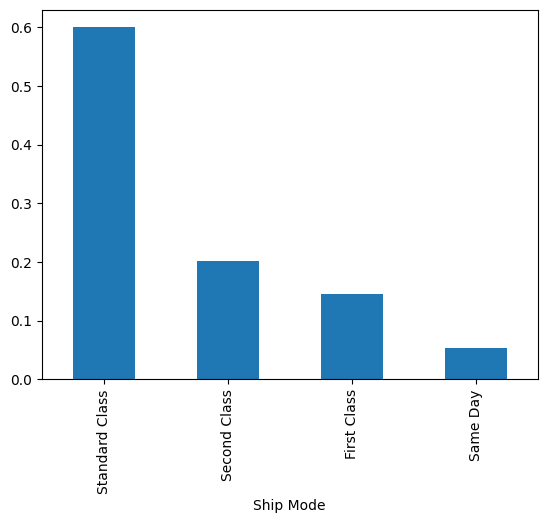

In [ ]:
# Returns a bar plot for Ship Mode
data = df['Ship Mode'].value_counts(ascending=False, normalize=True)
data.plot.bar();

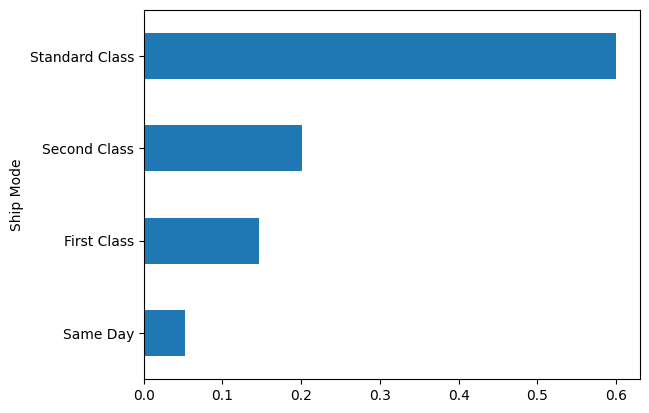

In [ ]:
# Returns a horizontal bar plot for Ship Mode
data = df['Ship Mode'].value_counts(ascending=True, normalize=True)
data.plot.barh();

Standard Class is the most used shipping method at 60%, followed by Second Class at 20%, First Class at 15% and Same Day at 5%.

In [ ]:
# Returns the data percentages for Segment
data = df.Segment.value_counts(ascending=True, normalize=True)
data

,proportion
Segment,
Home Office,0.18
Corporate,0.30
Consumer,0.52


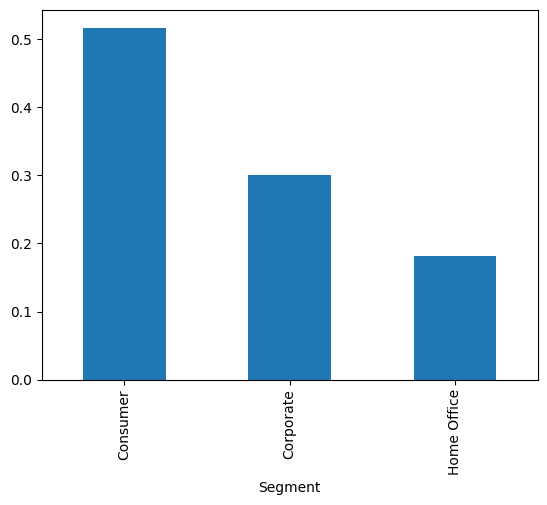

In [ ]:
# Returns a bar plot for Segment
data = df.Segment.value_counts(ascending=False, normalize=True)
data.plot.bar();

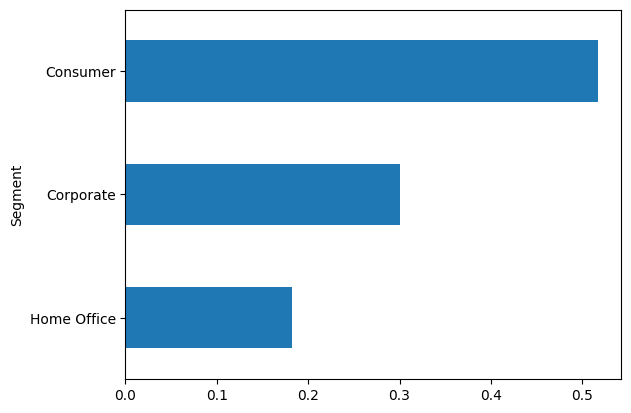

In [ ]:
# Returns a horizontal bar plot for Segment
data = df.Segment.value_counts(ascending=True, normalize=True)
data.plot.barh();

The largest market segment is Consumers who make up 52% of products sold.                                                                                                                                                                                                                                                       

In [ ]:
# Returns the data percentages for Regions
data = df.Region.value_counts(ascending=True, normalize=True)
data

,proportion
Region,
Central Asia,0.00
Canada,0.01
Southern Africa,0.01
Central Africa,0.01
Eastern Africa,0.01
North Africa,0.02
Western Africa,0.03
Eastern Europe,0.03
Southern US,0.03


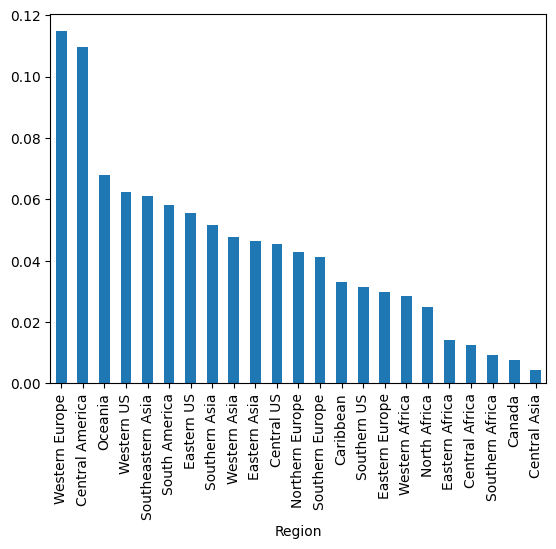

In [ ]:
# Returns a bar plot for Region
data = df.Region.value_counts(ascending=False, normalize=True)
data.plot.bar();

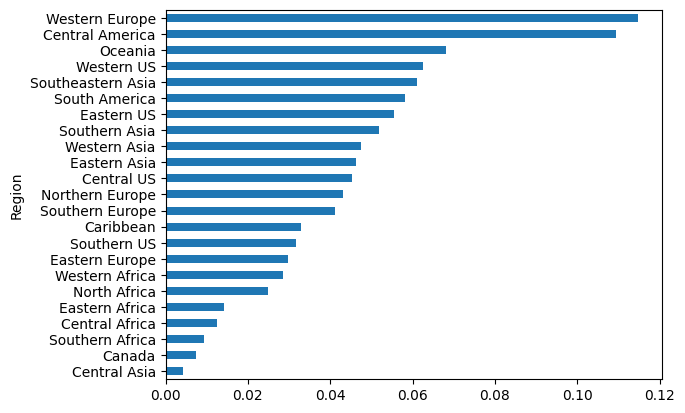

In [ ]:
# Returns a horizontal bar plot for Region
data = df.Region.value_counts(ascending=True, normalize=True)
data.plot.barh();

A large majority of Superstore's clientele order from Western Europe and Central America.

In [ ]:
# Returns the data percentages for Market
data = df.Market.value_counts(ascending=True, normalize=True)
data

,proportion
Market,
Africa,0.09
LATAM,0.20
USCA,0.20
Europe,0.23
Asia Pacific,0.28


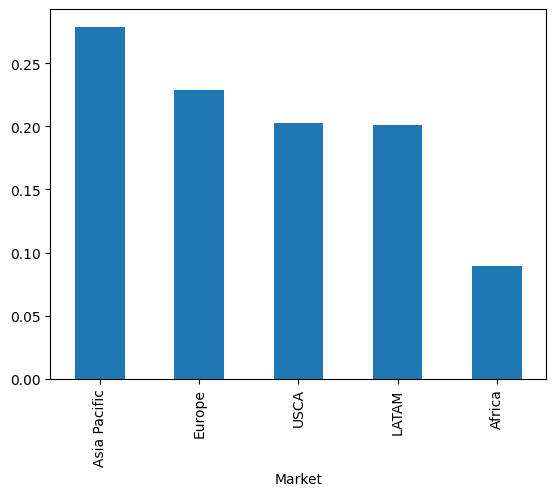

In [ ]:
# Returns a bar plot for Market
data = df.Market.value_counts(ascending=False, normalize=True)
data.plot.bar();

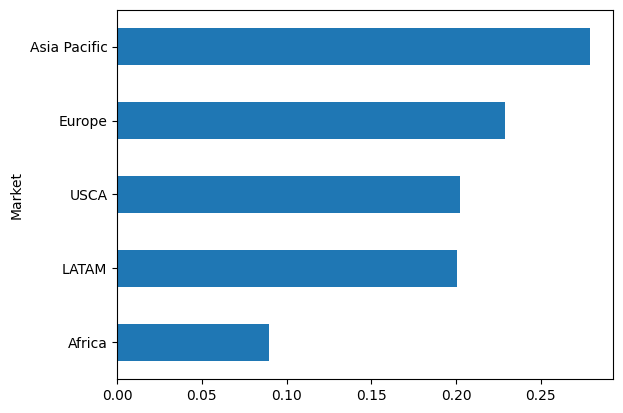

In [ ]:
# Returns a horizontal bar plot for Market
data = df.Market.value_counts(ascending=True, normalize=True)
data.plot.barh();

Superstore's Market consists of 28% Asia Pacific, 23% Europe, 20% USCA (United States), 20% LATAM (Latin America), and 9% Africa.  

In [ ]:
# Returns the data percentages for Category
data = df.Category.value_counts(ascending=True, normalize=True)
data

,proportion
Category,
Furniture,0.19
Technology,0.20
Office Supplies,0.61


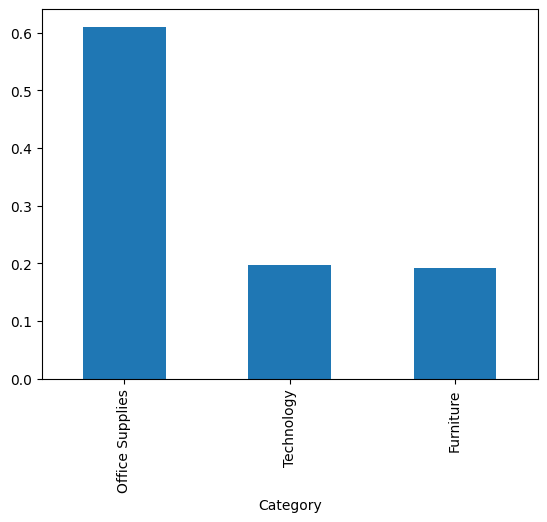

In [ ]:
# Returns a bar plot for Category
data = df.Category.value_counts(ascending=False, normalize=True)
data.plot.bar();

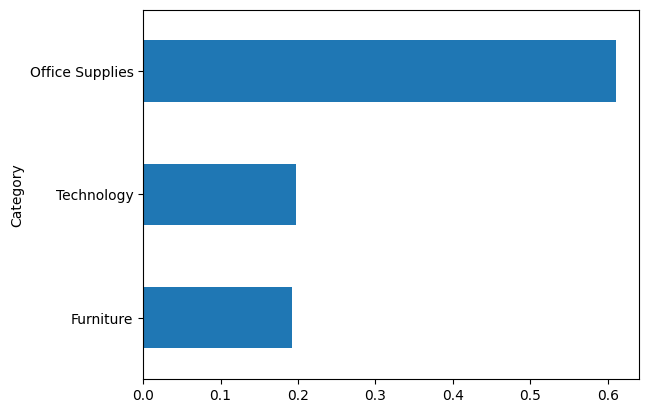

In [ ]:
# Returns a horizontal bar plot for Category
data = df.Category.value_counts(ascending=True, normalize=True)
data.plot.barh();

Office supplies make 61% of the total sales for Superstore. Technology is 20% and furniture is 19%.

In [ ]:
# Returns the data percentages for Sub-Category
data = df['Sub-Category'].value_counts(ascending=False, normalize=True)
data

,proportion
Sub-Category,
Binders,0.12
Storage,0.10
Art,0.09
Paper,0.07
Chairs,0.07
Phones,0.07
Furnishings,0.06
Accessories,0.06
Labels,0.05


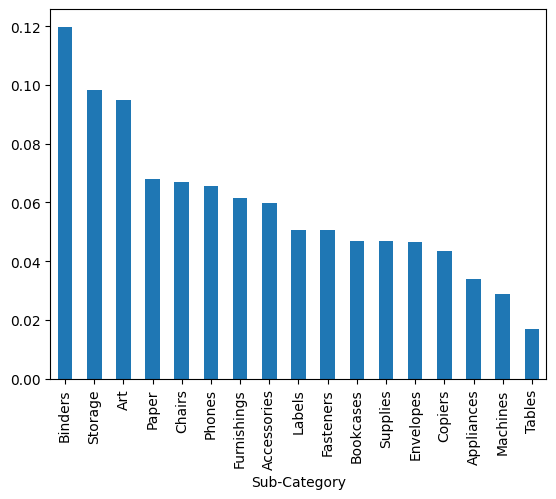

In [ ]:
# Returns a bar plot for Sub-Category
data = df['Sub-Category'].value_counts(ascending=False, normalize=True)
data.plot.bar();

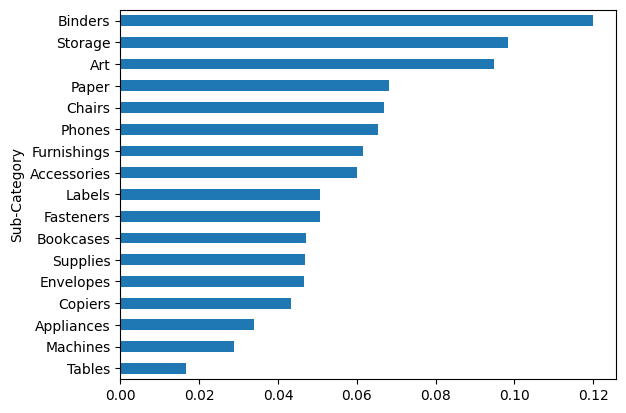

In [ ]:
# Returns a horizontal bar plot for Sub-Category
data = df['Sub-Category'].value_counts(ascending=True, normalize=True)
data.plot.barh();

The top 5 products Superstore sell are binders, storage items, art, paper, and chairs.

In [ ]:
# Returns the data percentages for Order Priority
data = df['Order Priority'].value_counts(ascending=False, normalize=True)
data

,proportion
Order Priority,
Medium,0.57
High,0.30
Critical,0.08
Low,0.05


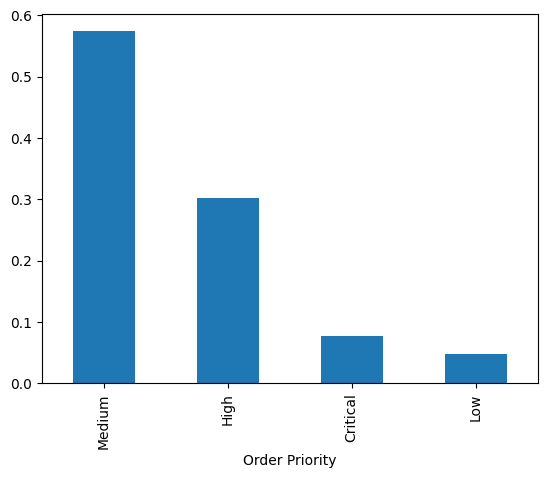

In [ ]:
# Returns a bar plot for Order Priority
data = df['Order Priority'].value_counts(ascending=False, normalize=True)
data.plot.bar();

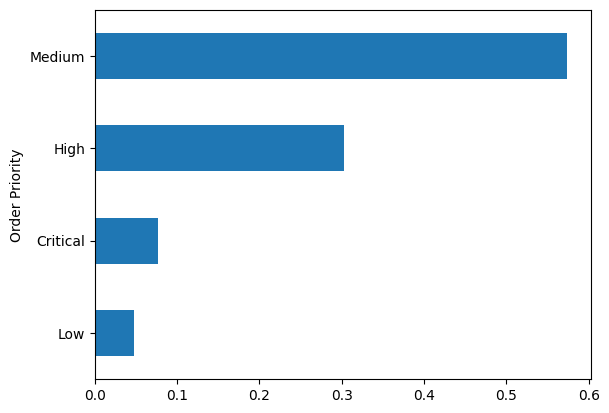

In [ ]:
# Returns a horizontal bar plot for Order Priority
data = df['Order Priority'].value_counts(ascending=True, normalize=True)
data.plot.barh();

Superstore saw most of its orders as medium priority at 57%. High at 30%. Critical at 8% and low being the least utliized at 5%.